In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')

Text(0.5, 1.0, 'Correlacion entre variables')

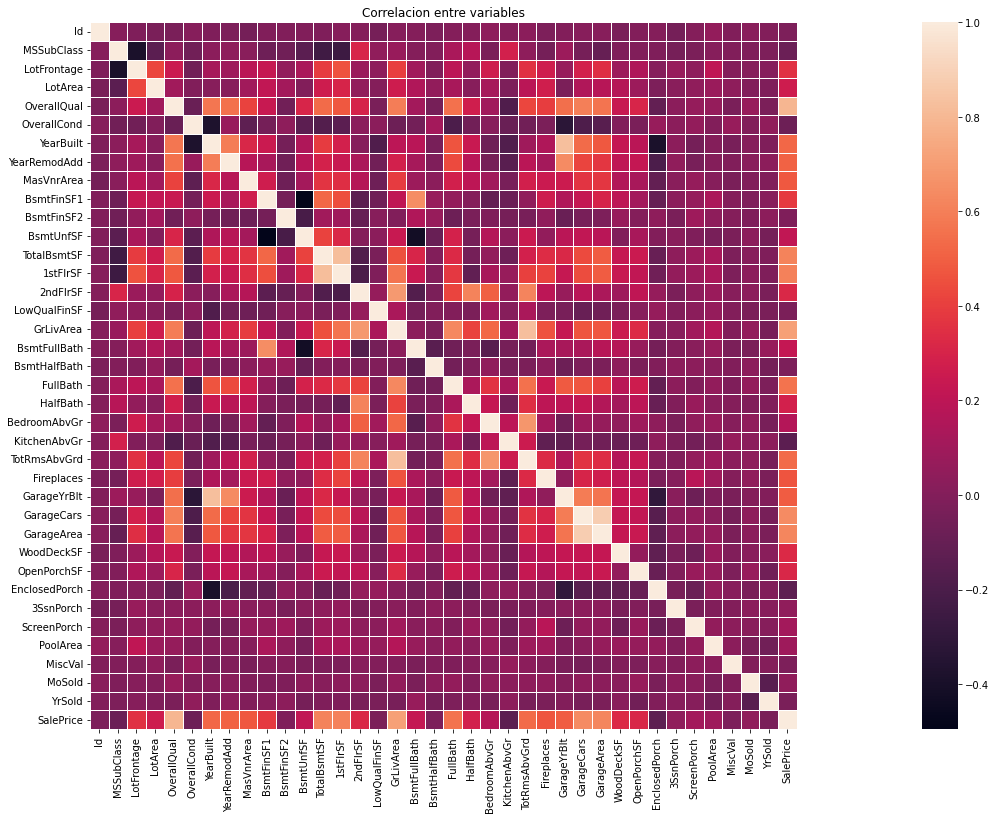

In [3]:
correlacion_datos = datos.corr()
f, ax = plt.subplots(figsize=(45, 13))
sb.heatmap(correlacion_datos, vmax=1,square=True, linewidths=.5)
plt.title("Correlacion entre variables")

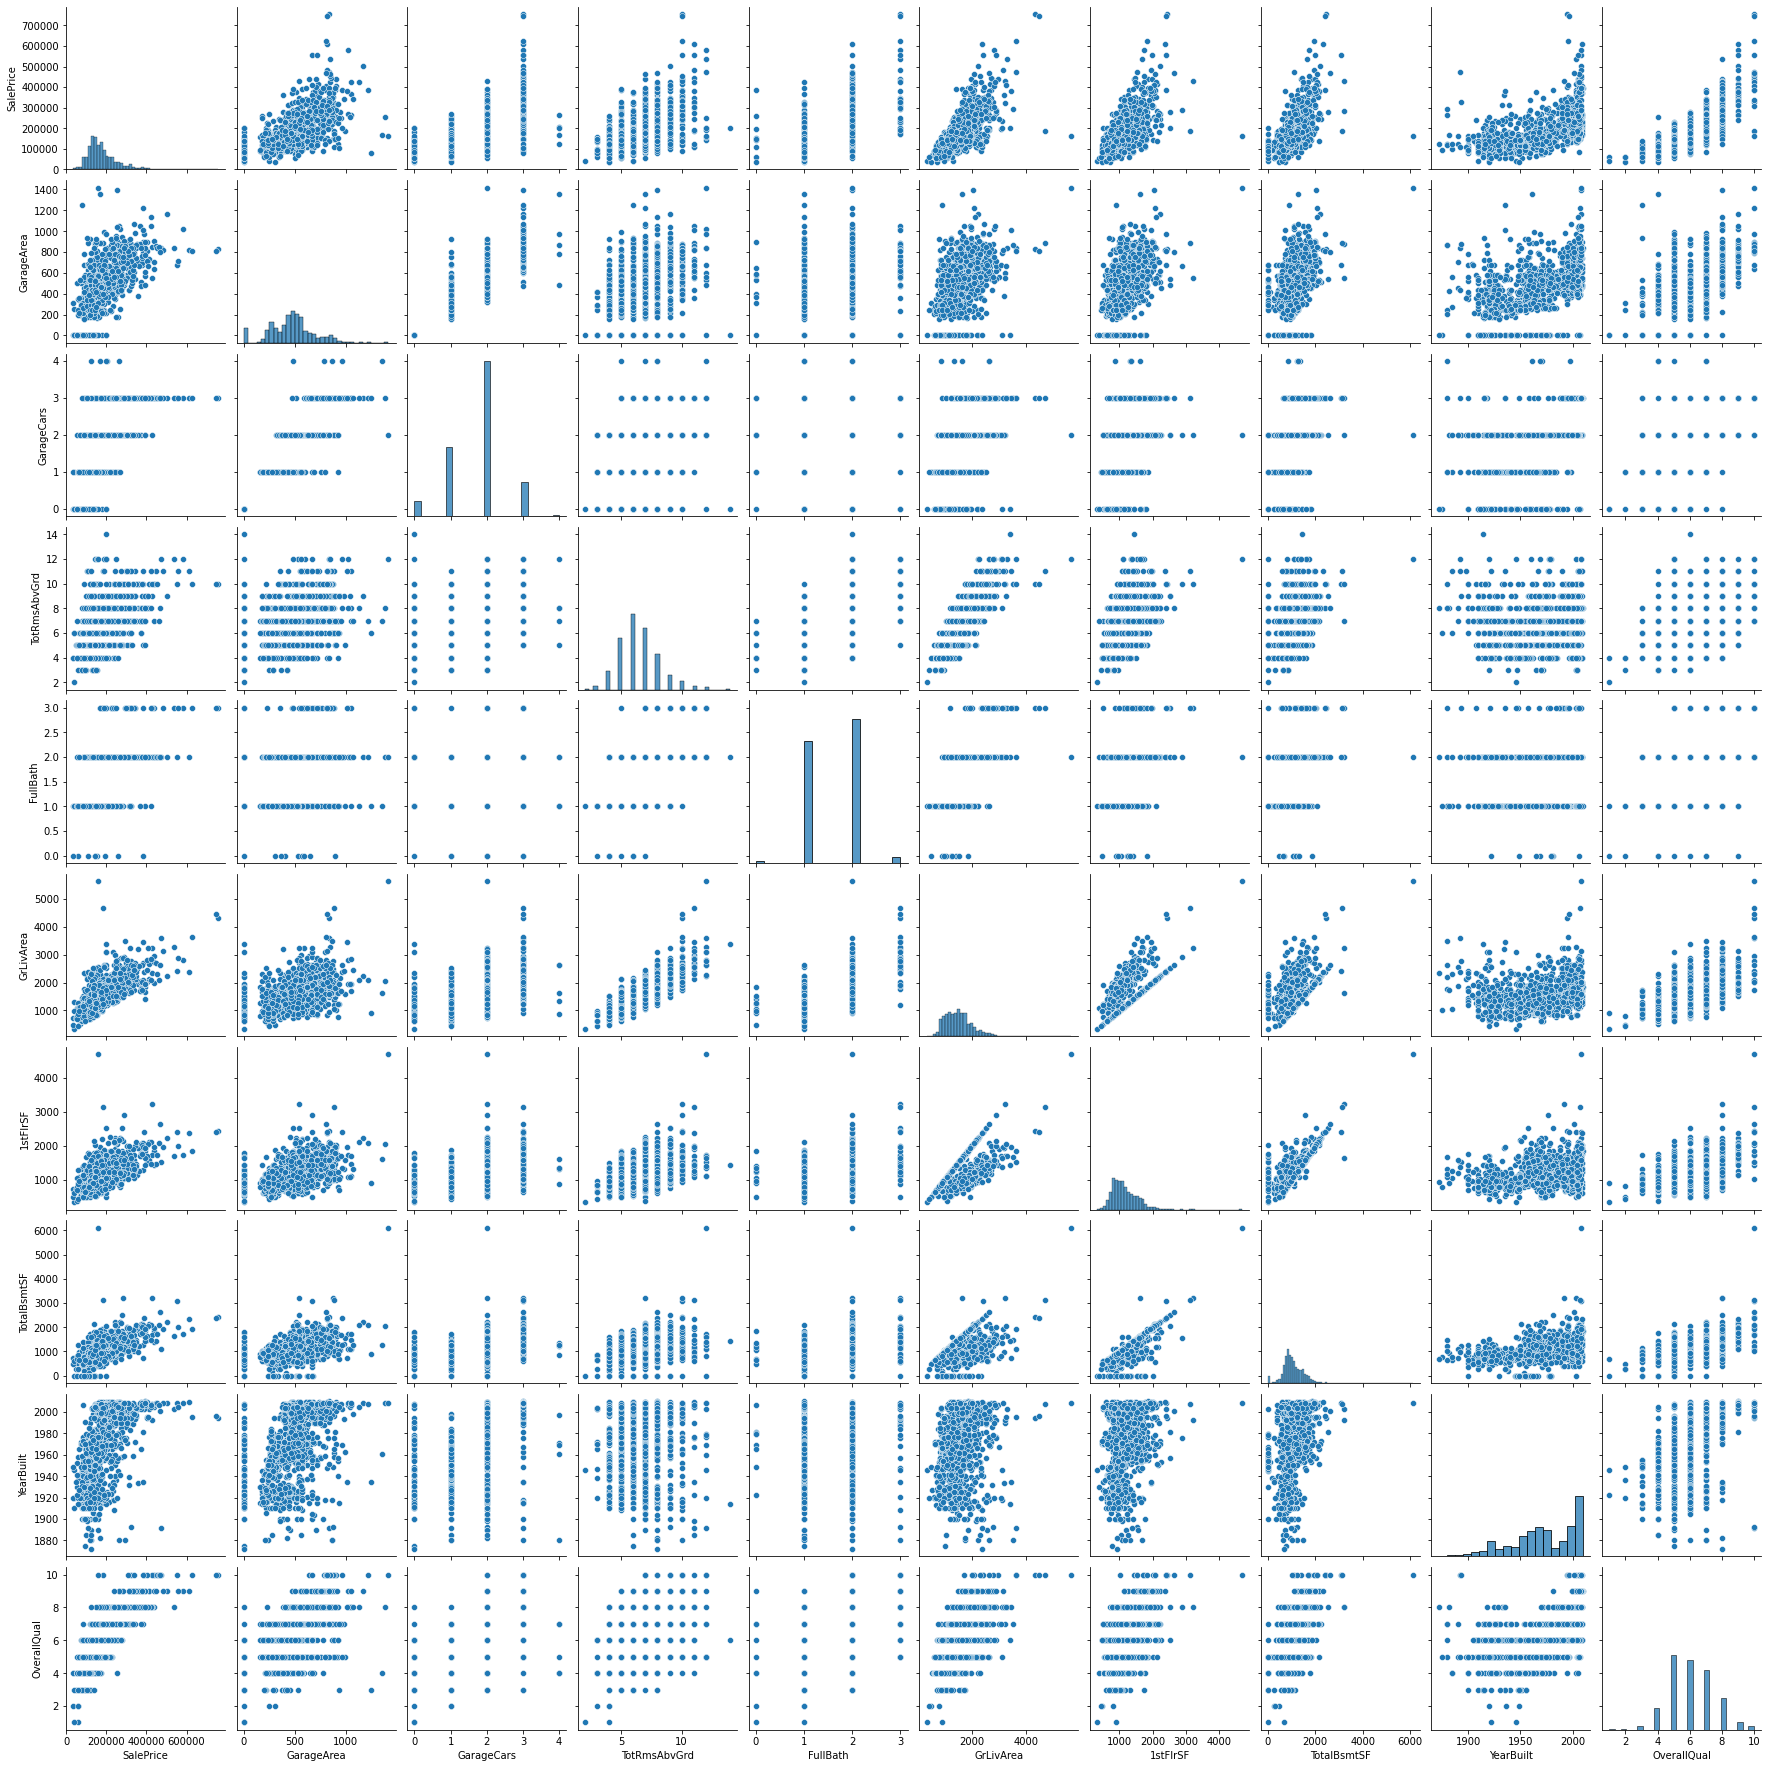

In [4]:
sb.pairplot(datos,vars=["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"])

#### Seleccione la variable respuesta

In [5]:
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()

In [6]:
def clasificacion_casas(precio):
    if (precio >= 34900 and precio<163000):
        return "Economica"
    elif (precio>= 163000 and precio<214000):
        return "Intermedia"
    else:
        return "Cara"

In [8]:
datos_cluster['clasificacion'] =  datos_cluster.apply(lambda row : clasificacion_casas(row['SalePrice']), axis = 1)
datos_cluster

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual,clasificacion
0,208500,548,2,8,2,1710,856,856,2003,7,Intermedia
1,181500,460,2,6,2,1262,1262,1262,1976,6,Intermedia
2,223500,608,2,6,2,1786,920,920,2001,7,Cara
3,140000,642,3,7,1,1717,961,756,1915,7,Economica
4,250000,836,3,9,2,2198,1145,1145,2000,8,Cara
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,460,2,7,2,1647,953,953,1999,6,Intermedia
1456,210000,500,2,7,2,2073,2073,1542,1978,6,Intermedia
1457,266500,252,1,9,2,2340,1188,1152,1941,7,Cara
1458,142125,240,1,5,1,1078,1078,1078,1950,5,Economica


In [9]:
y = datos_cluster.pop("clasificacion") #La variable respuesta
X = datos_cluster #El resto de los datos
random.seed(123)

#### Genere  dos  modelos  de  redes  neuronales  que  sea  capaz  de  clasificar  usando  la  variable respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener diferentes topologías y funciones de activación.